In [24]:
#to enable visualizations 
%matplotlib inline
# linear algebra
import numpy as np 
# data processing, CSV file I/O 
import pandas as pd 
import matplotlib.pyplot as plt
#Python visualization library for statistical data visualization 
import seaborn as sns
plt.style.use('fivethirtyeight')
from subprocess import check_output
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv('C:\\Users\\oddin\\Desktop\\US_Income\\inc_occ_gender.csv')

df = df[~(df.M_weekly == 'Na')]
df = df[~(df.F_weekly == 'Na')]
       
df['M_weekly'] = df.M_weekly.apply(lambda x: int(x))
df['F_weekly'] = df.F_weekly.apply(lambda x: int(x))
df['M_workers'] = df.M_workers.apply(lambda x: int(x))
df['F_workers'] = df.F_workers.apply(lambda x: int(x))
df['All_weekly'] = df.All_weekly.apply(lambda x: int(x))
df['All_workers'] = df.All_workers.apply(lambda x: int(x))
df['M_share'] = df.M_workers/df.All_workers 
df['F_share'] = df.F_workers/df.All_workers 
df['non_weighted_all_weekly'] = (df.M_weekly + df.F_weekly)/2
df['Gap'] = df.M_weekly - df.F_weekly
df['Ratio'] = df.F_weekly/df.M_weekly
df['Ratio_of_workers'] = df.F_workers/df.M_workers

df = df.reset_index(drop = True)
df.head(15)

,Occupation,Job_Types,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M_share,F_share,non_weighted_all_weekly,Gap,Ratio,Ratio_of_workers
0,ALL OCCUPATIONS,All,109080,809,60746,895,48334,726,0.556894,0.443106,810.5,169,0.811173,0.795674
1,MANAGEMENT,Management,12480,1351,7332,1486,5147,1139,0.587500,0.412420,1312.5,347,0.766487,0.701991
2,Chief executives,Management,1046,2041,763,2251,283,1836,0.729446,0.270554,2043.5,415,0.815637,0.370904
3,General and operations managers,Management,823,1260,621,1347,202,1002,0.754557,0.245443,1174.5,345,0.743875,0.325282
4,Marketing and sales managers,Management,948,1462,570,1603,378,1258,0.601266,0.398734,1430.5,345,0.784779,0.663158
5,Administrative services managers,Management,170,1191,96,1451,73,981,0.564706,0.429412,1216.0,470,0.676085,0.760417
6,Computer and information systems managers,Management,636,1728,466,1817,169,1563,0.732704,0.265723,1690.0,254,0.860209,0.362661
7,Financial managers,Management,1124,1408,551,1732,573,1130,0.490214,0.509786,1431.0,602,0.652425,1.039927
8,Human resources managers,Management,254,1365,68,1495,186,1274,0.267717,0.732283,1384.5,221,0.852174,2.735294
9,Purchasing managers,Management,193,1348,109,1404,84,1226,0.564767,0.435233,1315.0,178,0.873219,0.770642


In [28]:
# to count the frequency of values for job types
df["Job_Types"].value_counts()

Office Workers         18
Management             17
Business               13
Production workers     12
Sales                  12
Health Professional     8
I.T.                    8
Culinary                8
Transportation          5
Education               5
Social Services         4
Science                 4
General Service         4
Protective Services     4
Grounds-keeping         4
Arts                    4
Engineering             3
Legal Services          2
Healthcare Support      2
Agriculture             2
Maintenance             1
All                     1
Construction            1
Name: Job_Types, dtype: int64

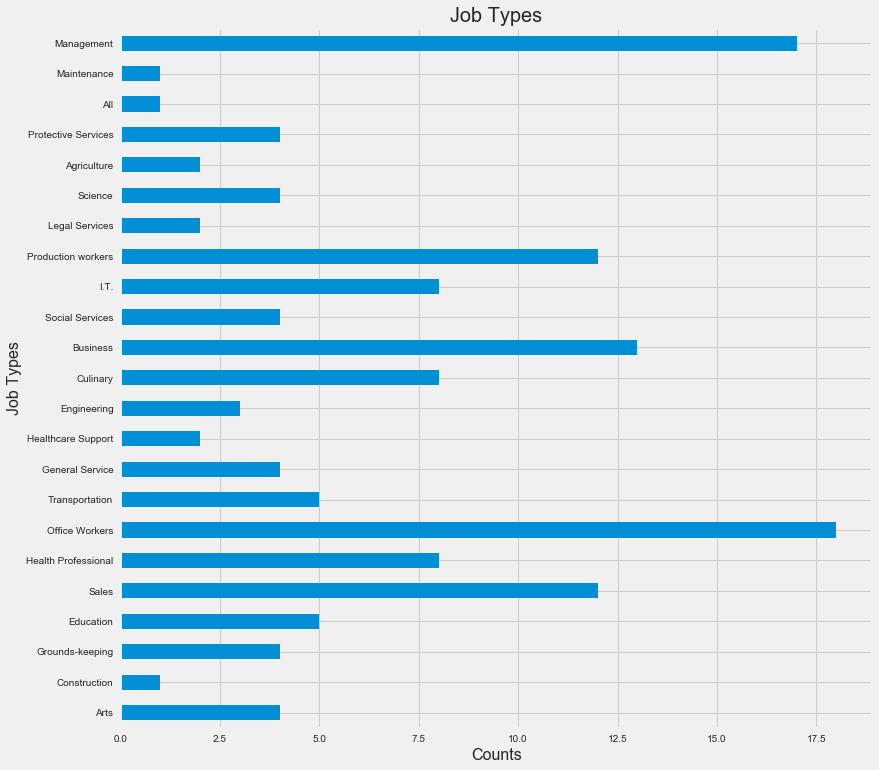

In [34]:
#To create a bar chart showing counts for the job types 
fig,ax = plt.subplots(figsize=(12,12))
df['Job_Types'].value_counts(sort=False).plot(kind='barh')
plt.title('Job Types',fontsize=20)
plt.xlabel('Counts',fontsize=16)
plt.ylabel('Job Types',fontsize=16)

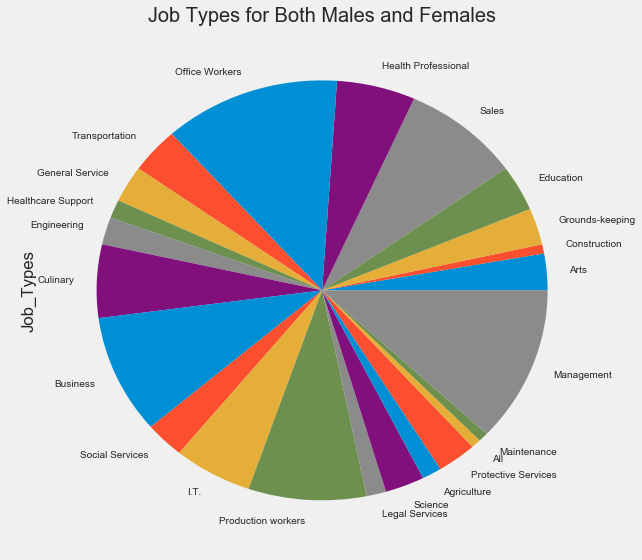

In [39]:
#To create a pie chart
fig,ax = plt.subplots(figsize=(9,9))
df['Job_Types'].value_counts(sort=False).plot(kind='pie')
plt.title('Job Types for Both Males and Females',fontsize=20)

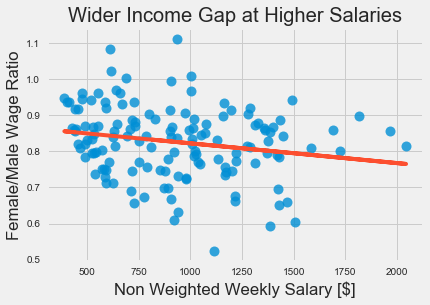

In [63]:
plt.plot(df.non_weighted_all_weekly, df.Ratio,'o',markersize = 10, alpha = 0.8)
plt.xlabel('Non Weighted Weekly Salary [$]')
plt.ylabel('Female/Male Wage Ratio')
plt.title('Wider Income Gap at Higher Salaries')

x = df.non_weighted_all_weekly
y = df.Ratio
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))

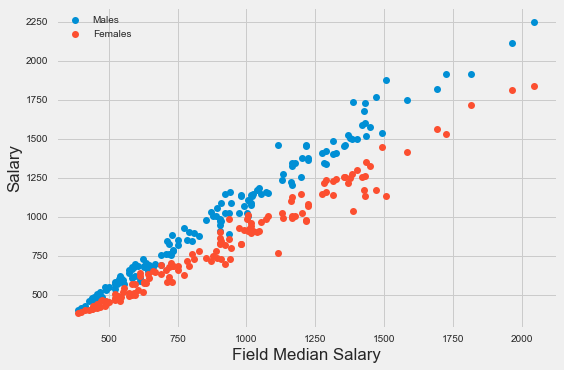

In [7]:
plt.plot(df.non_weighted_all_weekly, df.M_weekly,'o')
plt.plot(df.non_weighted_all_weekly, df.F_weekly,'o')
plt.legend(['Males','Females'])
plt.xlabel('Field Median Salary')
plt.ylabel('Salary')
plt.show()

In [53]:
sorted_df = df.sort(['Ratio'], ascending = [True])

plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(10),sorted_df.tail(10).Ratio)
plt.yticks(range(10),sorted_df.tail(10).Occupation, fontsize = 10)
plt.plot([1,1],[0,10], '--',color = 'r')
plt.title('Most Equal Fields')
plt.xlim([0,1.2])

plt.subplot(2,1,2)
plt.style.use('fivethirtyeight')
plt.barh(range(10),sorted_df.head(10).Ratio)
plt.yticks(range(10),sorted_df.head(10).Occupation, fontsize = 10)
plt.plot([1,1],[0,10], '--',color = 'r')
plt.title('Most unequal Fields')
plt.xlim([0,1.2])
plt.xlabel('Female/Male wage ratio')

AttributeError: 'DataFrame' object has no attribute 'sort'

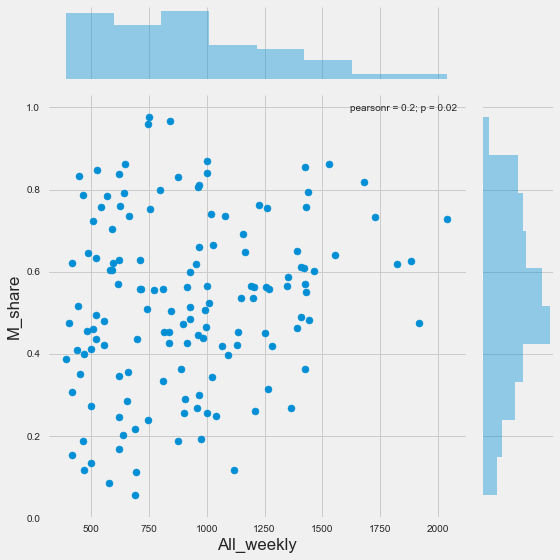

In [59]:
#Use the seaborn library to create seaborn jointplot
#Two kinds of distribution in one visualization i.e. bivariate scatterplots and univariate histograms 
sns.jointplot(x="All_weekly", y="M_share", data=df, size=8)

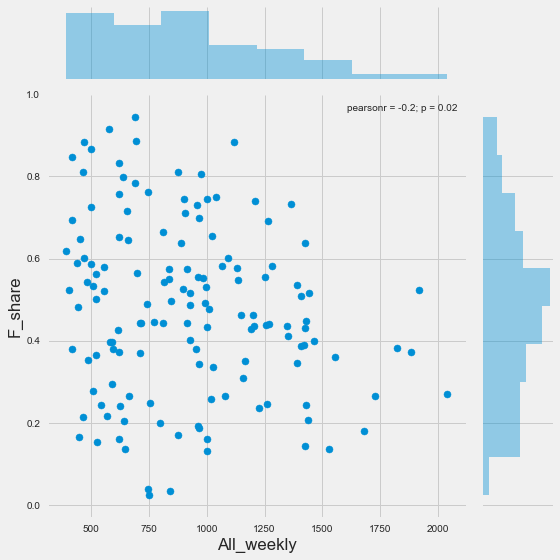

In [60]:
#Use the seaborn library to create seaborn jointplot
#Two kinds of distribution in one visualization i.e. bivariate scatterplots and univariate histograms 
sns.jointplot(x="All_weekly", y="F_share", data=df, size=8)

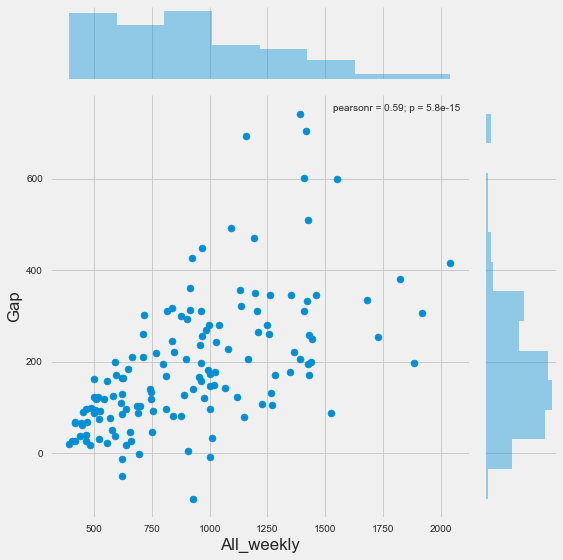

In [62]:
#Use the seaborn library to create seaborn jointplot
#Two kinds of distribution in one visualization i.e. bivariate scatterplots and univariate histograms 
sns.jointplot(x="All_weekly", y="Gap", data=df, size=8)